In [ ]:
#activité de cc de group
# Groupe PI 2
# Data A2 & Data B2

In [1]:
#serie 1:

In [38]:
#import serie 1
A<-read.table(file= file.choose(),header=F)
A.ts<-ts(A, start =c(2001, 1),end=c(2020, 1), freq=12)

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

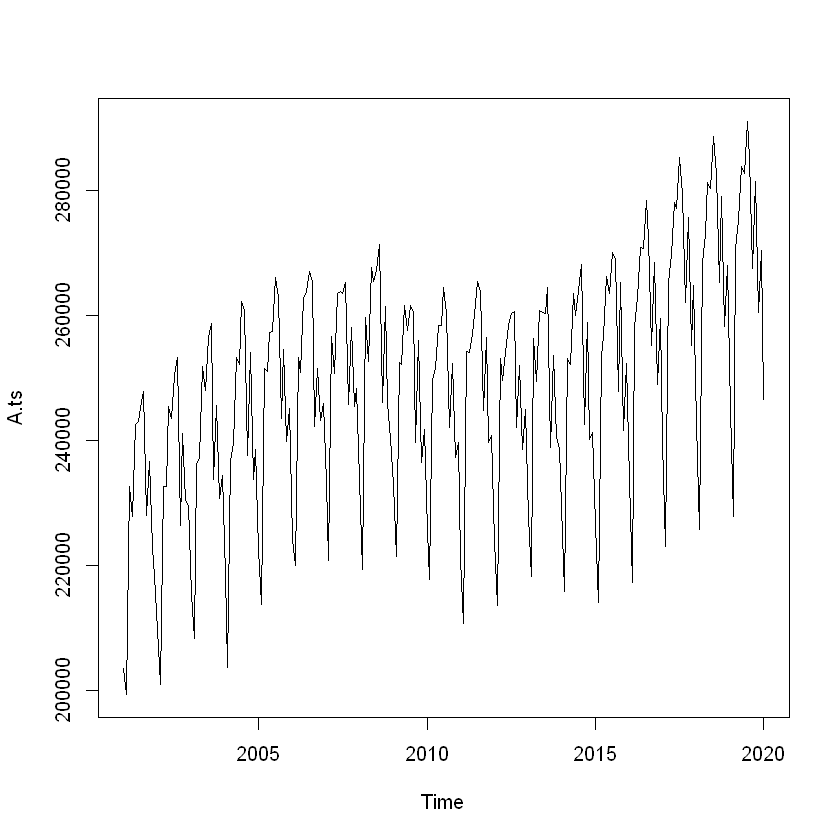

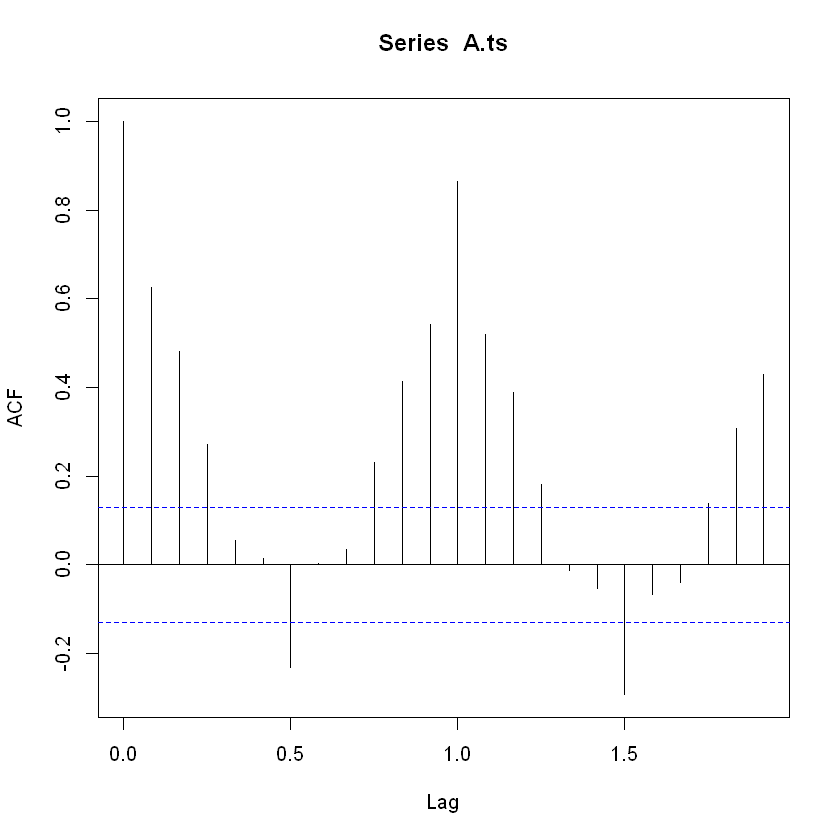

In [39]:
#graph et acf + analyse
plot(A.ts)
#Analyse du graph de la serie temporelle:
# un changement systématique non périodique ⇒ tendance.
# un changement répété cad il existe des fluctuation reguliére ⇒ saisonnalité
acf(A.ts)

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

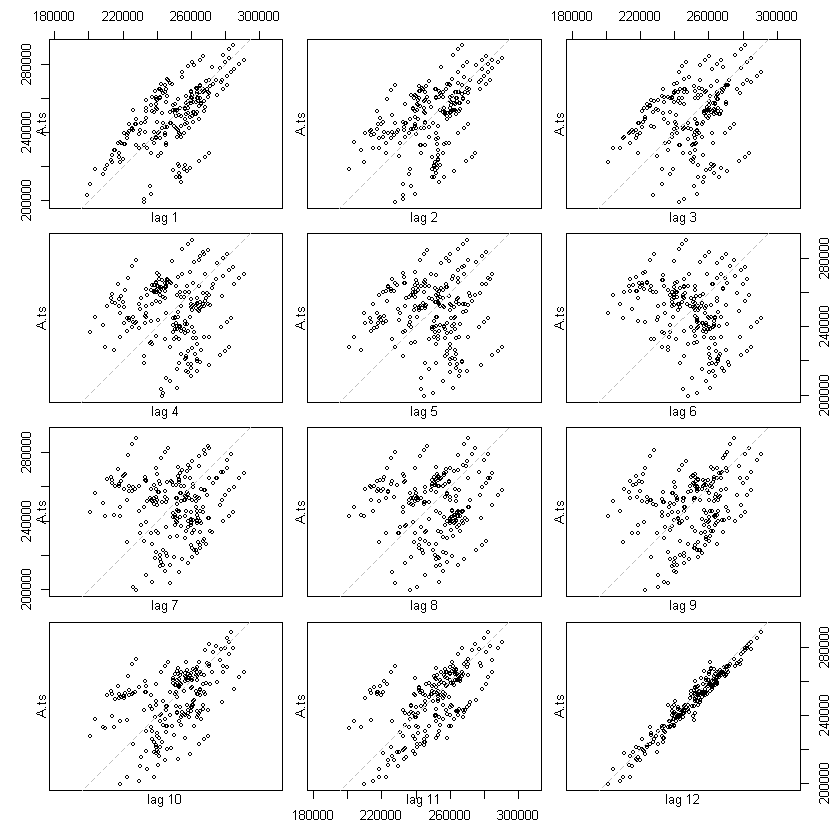

In [40]:
lag.plot(A.ts,layout=c(4,3),lags=12)
# ρˆn(k) est proche de 1 dans le lag 12
# lag 1 à 11 les point sont disparsut càd ρˆn(k) est proche de 0

[1] "decomposed.ts"

[1] "decomposed.ts"

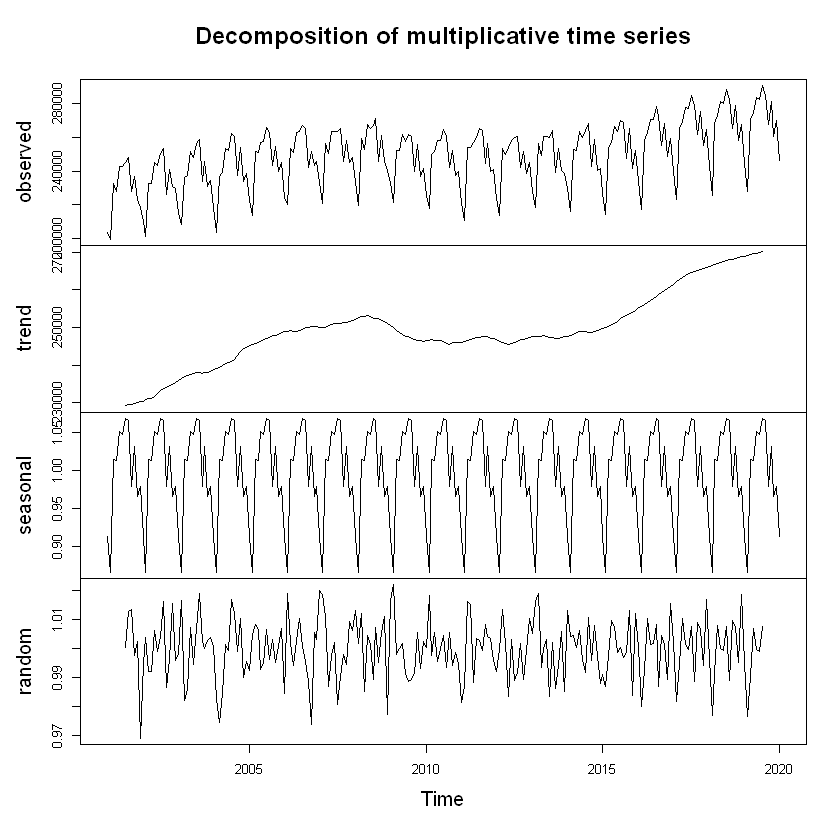

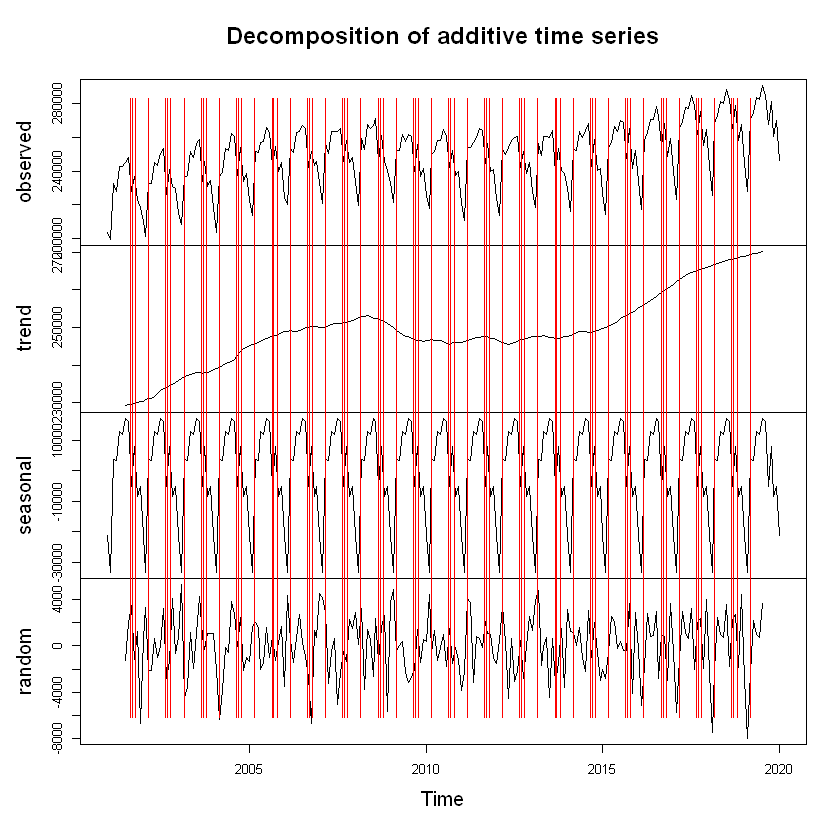

In [41]:
dec.mul<-decompose(A.ts, type ="multiplicative", filter = NULL)
class(dec.mul)
plot(dec.mul)
approx1.text<-dec.mul$trend*dec.mul$seasonal
lines(approx1.text,col="red")
dec.add<-decompose(A.ts, type ="additive", filter = NULL)
class(dec.add)
plot(dec.add)
approx2.text<-dec.add$trend*dec.add$seasonal
lines(approx2.text,col="red")
# interpretation:
# le modele adequat c'est le modele multiplicative

In [42]:
#ajustement
t<-c(1:length(A.ts))
s.t<-(t-mean(t))/sd(t) 
CS<-matrix(0,length(A.ts),6)
SN<-matrix(0,length(A.ts),6)
for (i in 1:6) CS[,i]<-cos(2*pi*t/(12/i))
for (i in 1:6) SN[,i]<-sin(2*pi*t/(12/i))
test1<-lm(A.ts~s.t+I(s.t^2)+CS+SN)
summary(test1)
# les valeus de p-value de CS6 et SN6 >0.05
# Il faut éliminer les coefficients non significatifs!!




Call:
lm(formula = A.ts ~ s.t + I(s.t^2) + CS + SN)

Residuals:
     Min       1Q   Median       3Q      Max 
-13299.1  -4705.8   -300.8   4980.6  11953.3 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.485e+05  5.860e+02 424.089  < 2e-16 ***
s.t          9.097e+03  3.919e+02  23.212  < 2e-16 ***
I(s.t^2)     8.790e+02  4.389e+02   2.003 0.046462 *  
CS1         -1.524e+04  5.520e+02 -27.616  < 2e-16 ***
CS2          1.972e+03  5.532e+02   3.566 0.000448 ***
CS3          4.627e+03  5.537e+02   8.356 8.18e-15 ***
CS4          1.476e+03  5.533e+02   2.667 0.008247 ** 
CS5          2.198e+03  5.526e+02   3.978 9.51e-05 ***
CS6          1.685e+02  4.702e+02   0.358 0.720400    
SN1         -7.993e+03  5.535e+02 -14.441  < 2e-16 ***
SN2         -5.379e+03  5.521e+02  -9.743  < 2e-16 ***
SN3         -4.324e+03  5.532e+02  -7.817 2.41e-13 ***
SN4          2.796e+03  5.539e+02   5.048 9.55e-07 ***
SN5          7.848e+03  5.545e+02  14.155  < 2e-16 ***
SN6

In [43]:
test2<-lm(A.ts~s.t+I(s.t^2)+CS[,-6]+SN[,-6])
summary(test2)


Call:
lm(formula = A.ts ~ s.t + I(s.t^2) + CS[, -6] + SN[, -6])

Residuals:
     Min       1Q   Median       3Q      Max 
-13141.4  -4671.3   -546.6   4922.7  11831.3 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 248506.1      583.9 425.626  < 2e-16 ***
s.t           9094.5      390.5  23.292  < 2e-16 ***
I(s.t^2)       874.8      437.3   2.001 0.046677 *  
CS[, -6]1   -15244.6      550.0 -27.716  < 2e-16 ***
CS[, -6]2     1974.3      551.1   3.582 0.000421 ***
CS[, -6]3     4630.0      551.6   8.393 6.21e-15 ***
CS[, -6]4     1482.3      551.0   2.690 0.007704 ** 
CS[, -6]5     2208.0      549.9   4.015 8.19e-05 ***
SN[, -6]1    -7997.3      551.4 -14.504  < 2e-16 ***
SN[, -6]2    -5376.5      549.9  -9.777  < 2e-16 ***
SN[, -6]3    -4339.8      549.3  -7.900 1.40e-13 ***
SN[, -6]4     2780.2      549.9   5.056 9.14e-07 ***
SN[, -6]5     7835.2      551.0  14.219  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residu

In [44]:
Comp<-c(AIC(test1), AIC(test2))
Comp
#Le 2ème modèle est meilleur puisque il a la valeur AIC la plus basse

[1] 4643.843 4640.358

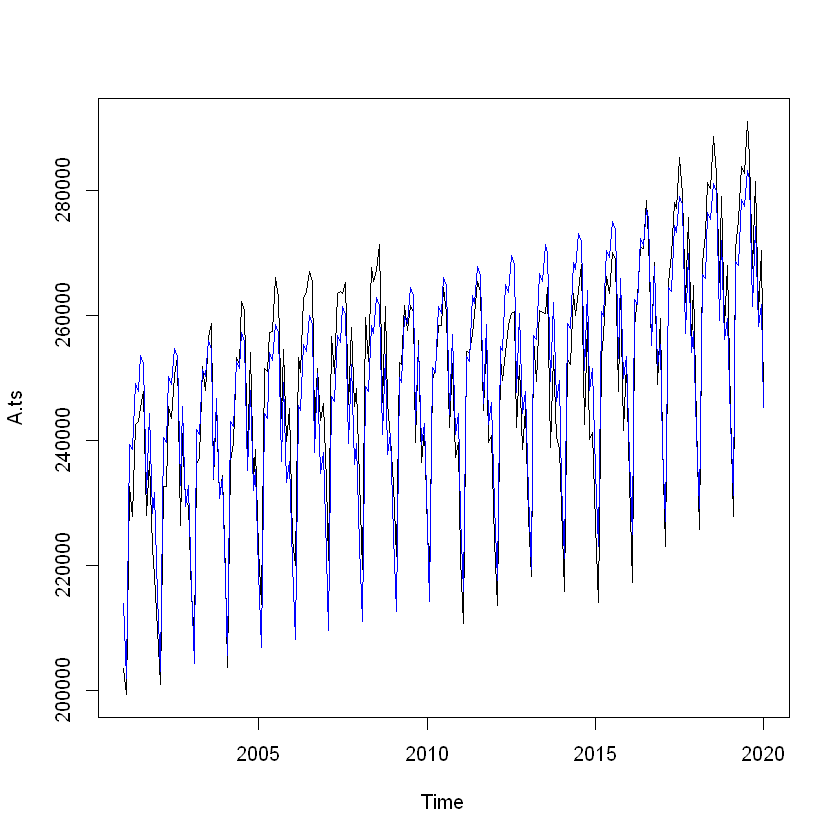

In [45]:
#sur le meme plot on va tracer la serie temporelle et la graph de la serie estimée (en bleu)
plot(A.ts)
fitted.ts<-ts(test2$fitted.values, start =c(2001, 1),end=c(2020, 1), freq=12) 
lines(fitted.ts, col=4)

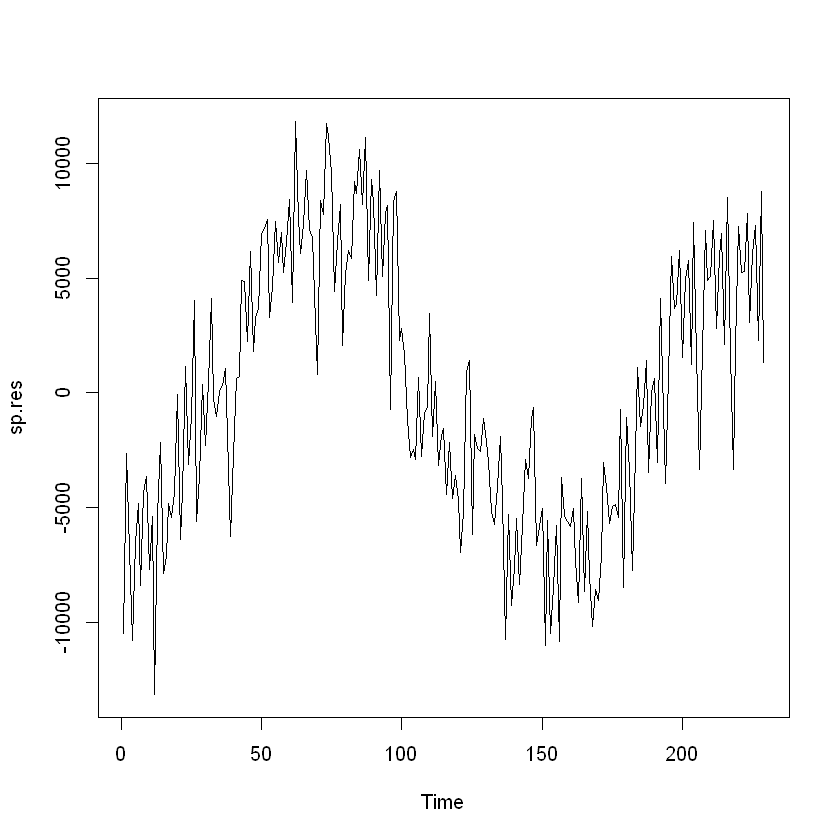

In [46]:
#Ajustement de la partie aléatoire de la série: le résidus
sp.res<-test2$residuals
ts.plot(sp.res)

In [47]:
#stationnarité + interpretation
install.packages('tseries')
require(tseries)
adf.test(sp.res)
#p-value>0.05, on accepte H_0 la serie nest pas stationnaire
#on doit différencier la serie

Warning message:
"package 'tseries' is in use and will not be installed"


	Augmented Dickey-Fuller Test

data:  sp.res
Dickey-Fuller = -1.7595, Lag order = 6, p-value = 0.677
alternative hypothesis: stationary


Warning message in adf.test(res.diff):
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  res.diff
Dickey-Fuller = -6.9398, Lag order = 6, p-value = 0.01
alternative hypothesis: stationary



	Box-Pierce test

data:  res.diff
X-squared = 44.742, df = 1, p-value = 2.247e-11


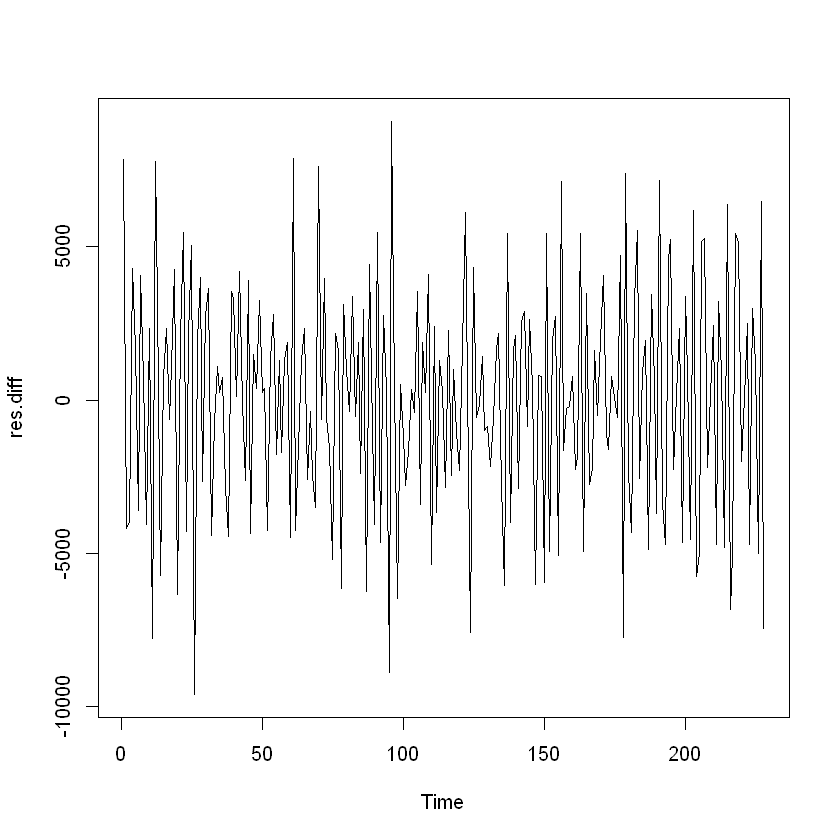

In [48]:
#Stationnarisation de la série des résidus par une différentiation d’ordre 1
res.diff<-diff(sp.res) 
plot.ts(res.diff) 
adf.test(res.diff) 
Box.test(res.diff)
#interpretation:
# p-value<0.05==> la série différenciée est stationnaire
# test de blancheur/ p-value<0.05==> la série différenciée n’est
# pas assimilable à un bruit blanc
# ==> On doit modéliser la série différenciée

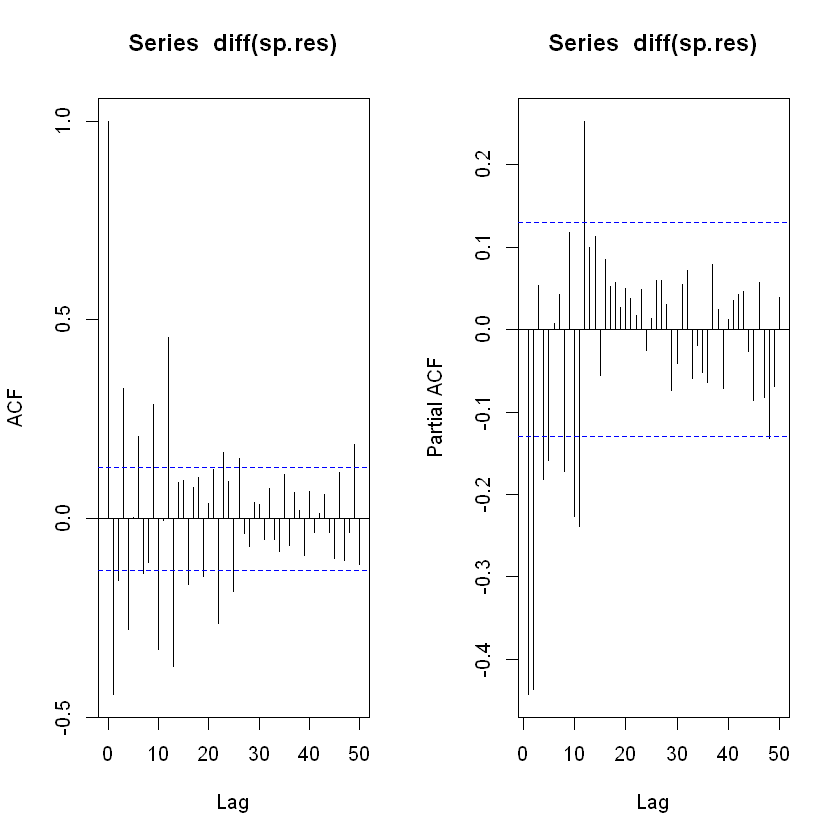

In [49]:
#modéle arma + inter
par(mfrow=c(1,2))
acf(diff(sp.res),50)
pacf(diff(sp.res),50)
# interpretation:
# on ne peut pas utiliser le modele AR ou MA

In [50]:
install.packages('forecast')
library(forecast) 
auto.arima(res.diff)
#interpretation:
#on va modeliser ARIMA (5,0,0)

Warning message:
"package 'forecast' is in use and will not be installed"

Series: res.diff 
ARIMA(5,0,0) with zero mean 

Coefficients:
          ar1      ar2      ar3      ar4      ar5
      -0.6468  -0.4952  -0.1339  -0.2903  -0.1690
s.e.   0.0660   0.0762   0.0825   0.0762   0.0666

sigma^2 estimated as 8613015:  log likelihood=-2141.93
AIC=4295.85   AICc=4296.23   BIC=4316.43

In [51]:
res.mod<-arima(res.diff, order=c(5,0,0))
res.mod


Call:
arima(x = res.diff, order = c(5, 0, 0))

Coefficients:
          ar1      ar2      ar3      ar4      ar5  intercept
      -0.6487  -0.4981  -0.1380  -0.2933  -0.1709    50.5691
s.e.   0.0660   0.0762   0.0826   0.0763   0.0666    70.3063

sigma^2 estimated as 8404975:  log likelihood = -2141.67,  aic = 4297.34

Warning message in adf.test(res.final):
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  res.final
Dickey-Fuller = -6.2027, Lag order = 6, p-value = 0.01
alternative hypothesis: stationary



	Box-Pierce test

data:  res.final
X-squared = 0.0090518, df = 1, p-value = 0.9242


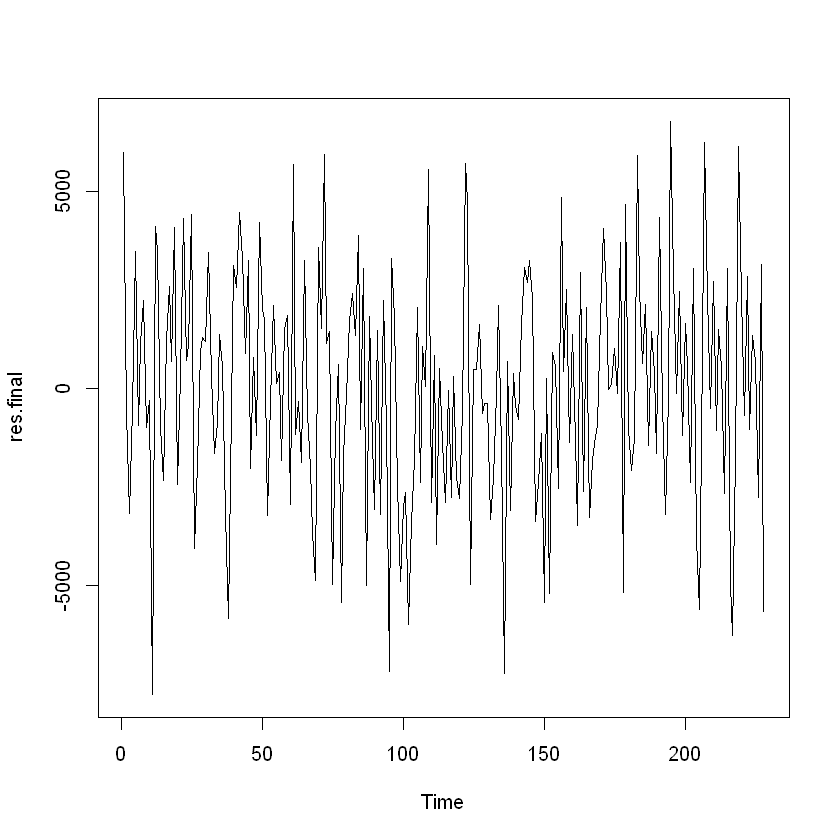

In [52]:
res.final<-res.mod$residuals
ts.plot(res.final)
adf.test(res.final) 
Box.test(res.final)
#interpretation:
# p-value<0.05 et p-value de box-pierce test >0.05 
# ==> le modele est parfait

In [ ]:
#serie 2

In [53]:
#import serie 2
B<-read.table(file= file.choose(),header=F)
B.ts<-ts(B, start =c(1960, 1),end=c(2021, 1), freq=12)

[1] "xts" "zoo"

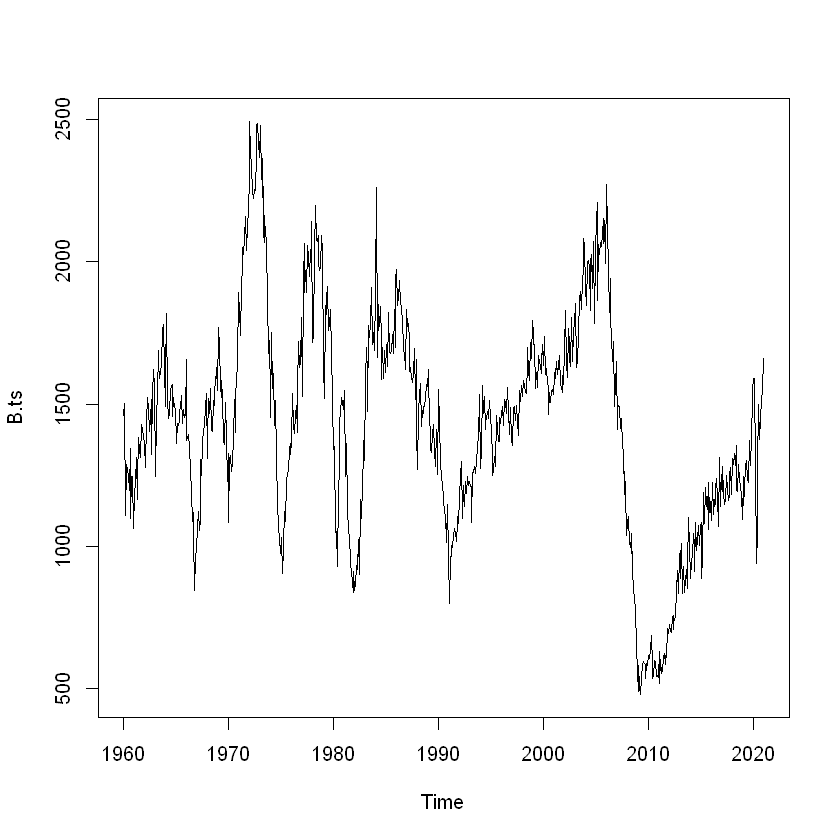

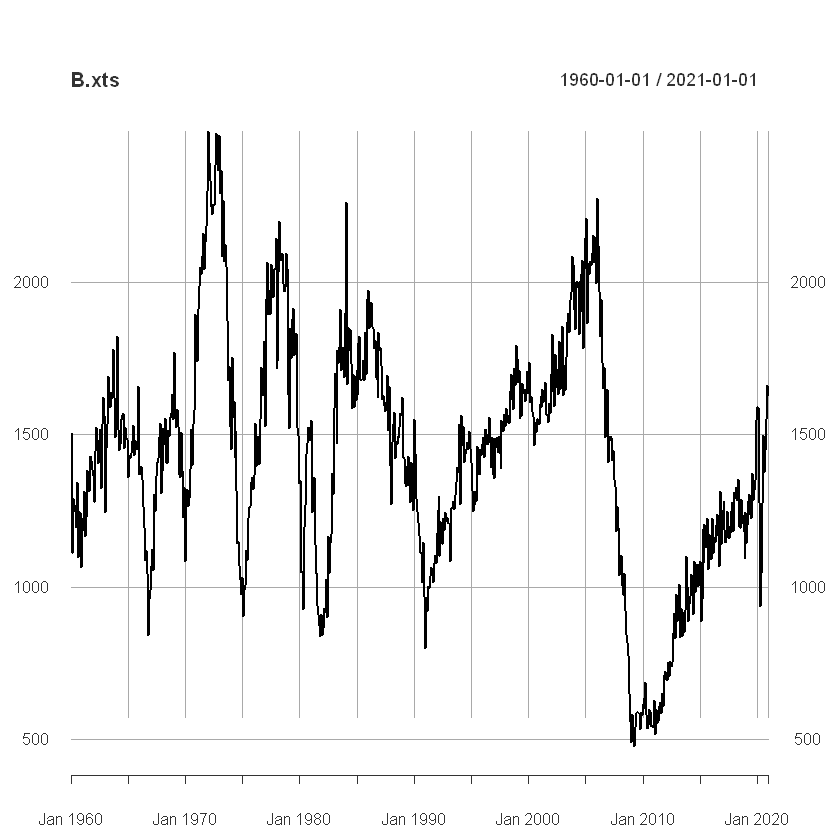

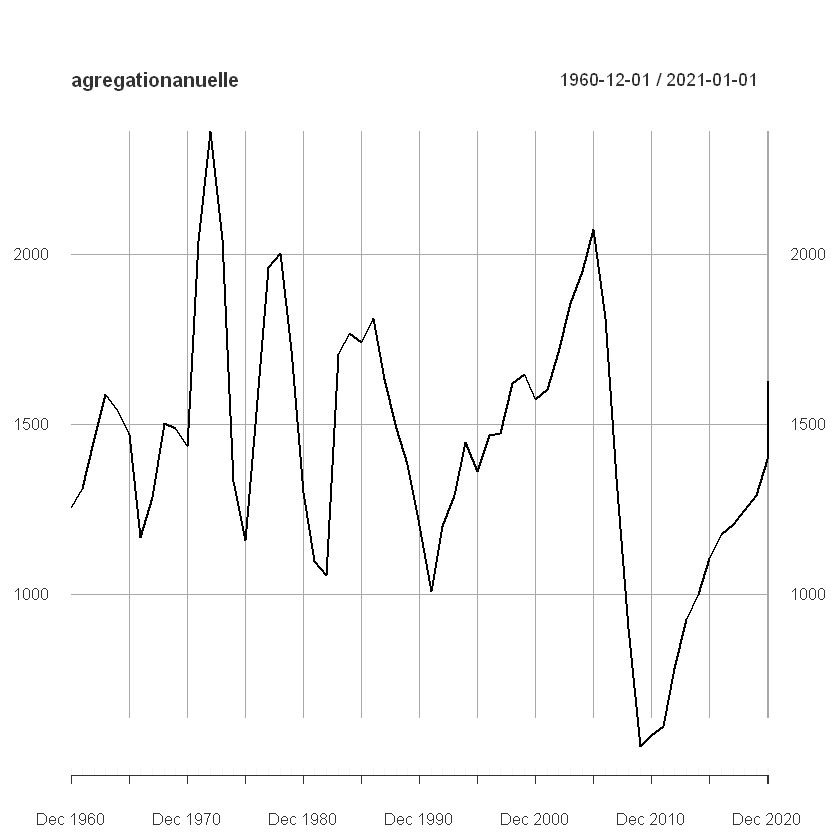

In [54]:
#graph + analyse
plot(B.ts)
#on va aggreger just pour avoir une meilleur visualisation
library(xts)
dat<-seq(as.Date("1960/1/1"), as.Date("2021/1/1"),by="months")
B.xts<-xts(B.ts,order.by=dat)
class(B.xts)
plot(B.xts)
agregationanuelle<-apply.yearly(B.xts, mean)
plot(agregationanuelle)
# la serie est semblable a bruit blanc car:
# 1- absence de tendance 
# 2- absence de périodicité
# donc la serie est stationnaire.
# ==>cela signifie qu’il n’y a rien à modéliser dans la partie non déterministe de la série

In [ ]:
#d'apres les interpretation du bloc presedent ==> Ajustement impossible

In [55]:
#la serie est visiblement stationnaire mais on va tester
install.packages('tseries')
require(tseries)
adf.test(B.ts)
# la serie est stationnaire : p-value<0.05

Warning message:
"package 'tseries' is in use and will not be installed"


	Augmented Dickey-Fuller Test

data:  B.ts
Dickey-Fuller = -3.6008, Lag order = 9, p-value = 0.03261
alternative hypothesis: stationary


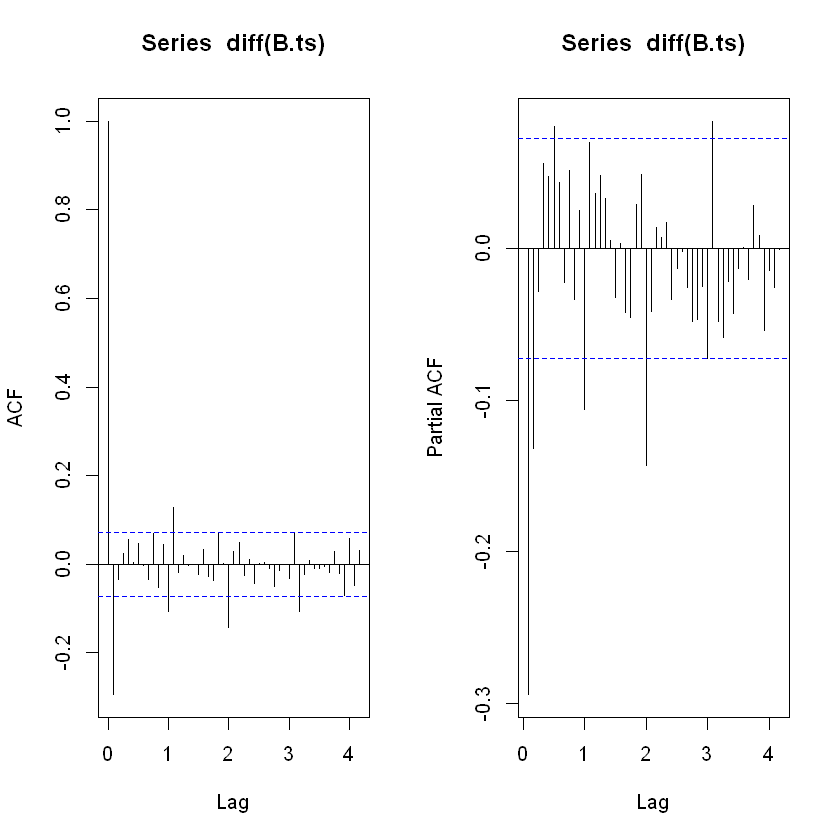

In [33]:
par(mfrow=c(1,2))
acf(diff(B.ts),50)
pacf(diff(B.ts),50)
#on va utiliser ARIMA, d'apres le plot de acf et pacf on ne peut pas utiliser AR ou MA

In [56]:
install.packages('forecast')
library(forecast) 
auto.arima(B.ts)
# d'apres la resultat en peut utiliser ARIMA (2,1,2) ou (2,0,0)

Warning message:
"package 'forecast' is in use and will not be installed"

Series: B.ts 
ARIMA(2,1,2)(2,0,0)[12] 

Coefficients:
         ar1      ar2      ma1     ma2     sar1     sar2
      0.8544  -0.2732  -1.1883  0.5321  -0.0889  -0.1628
s.e.  0.1234   0.1250   0.1127  0.1050   0.0388   0.0381

sigma^2 estimated as 11414:  log likelihood=-4455.49
AIC=8924.98   AICc=8925.14   BIC=8957.15

In [57]:
res.mod<-arima(B.ts, order=c(2,1,2))
res.mod


Call:
arima(x = B.ts, order = c(2, 1, 2))

Coefficients:
         ar1      ar2      ma1     ma2
      0.8921  -0.2864  -1.2349  0.5565
s.e.  0.1202   0.1072   0.1087  0.0939

sigma^2 estimated as 11677:  log likelihood = -4466.5,  aic = 8943.01

In [58]:
res.mod1<-arima(B.ts, order=c(2,0,0))
res.mod1


Call:
arima(x = B.ts, order = c(2, 0, 0))

Coefficients:
         ar1     ar2  intercept
      0.6893  0.2784  1427.9721
s.e.  0.0354  0.0354   118.6833

sigma^2 estimated as 11898:  log likelihood = -4480.65,  aic = 8969.3

Warning message in adf.test(res.final):
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  res.final
Dickey-Fuller = -8.4403, Lag order = 9, p-value = 0.01
alternative hypothesis: stationary



	Box-Pierce test

data:  res.final
X-squared = 0.011252, df = 1, p-value = 0.9155


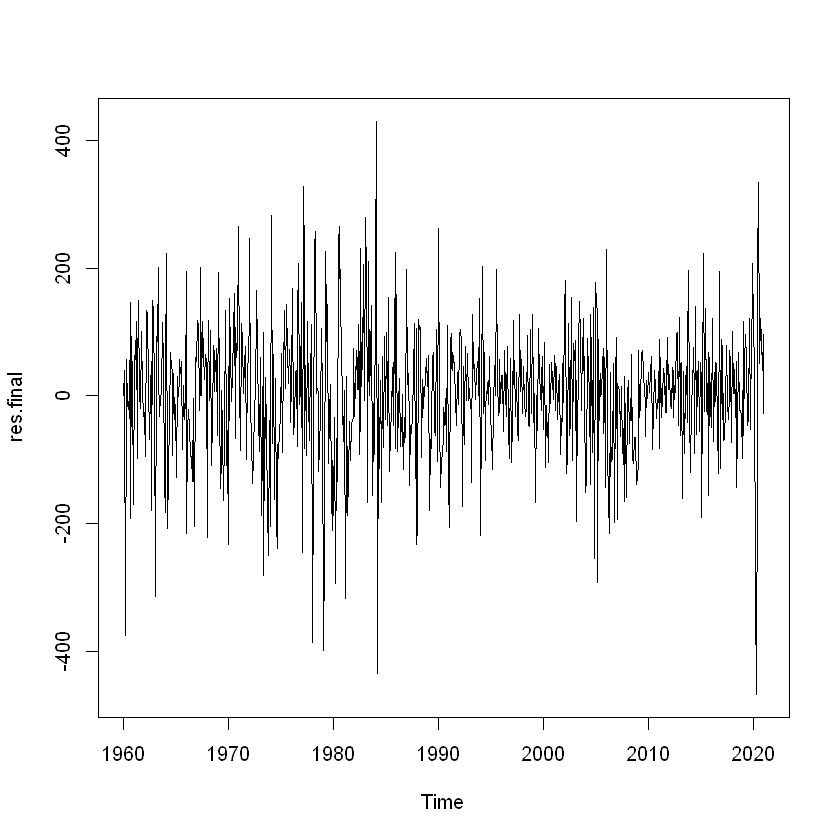

In [59]:
#d'apres les valeur de AIC on utilise ARIMA(2,1,2)
res.final<-res.mod$residuals
ts.plot(res.final)
adf.test(res.final) 
Box.test(res.final)
# interpretation:
# p-value<0.05 et p-value de box-pierce test >0.05 ==> le modele est parfait